# House Price Predictions - Regression Assumptions

In this notebook we will explore and make predictions on the housing dataset from Kaggle:\
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/

# Setup
#### Import Libraries

In [25]:
# data science
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.formula.api import ols

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
def ignore_warn(*args, **kwargs): pass
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.warn = ignore_warn

# config
pd.options.display.max_columns = None

#### Read the Data

In [26]:
# data frames
df_train = pd.read_csv('files/train_processed.csv')
df_test = pd.read_csv('files/test_processed.csv')
df_ytrain = df_train['SalePrice']

# merge
df_train = df_train.drop(columns='SalePrice')
df_all = pd.concat((df_train, df_test)).reset_index(drop=True)

print('train+test\t', df_all.shape)
print('train\t\t', df_train.shape)
print('test\t\t', df_test.shape)
print('y train\t\t', df_ytrain.shape)

train+test	 (2917, 79)
train		 (1458, 79)
test		 (1459, 79)
y train		 (1458,)


In [27]:
num_features = df_all.select_dtypes(exclude = ["object"]).columns
cat_features = df_all.select_dtypes(include = ["object"]).columns

# Verify Regression Assumptions
https://openclassrooms.com/en/courses/5873596-design-effective-statistical-models-to-understand-your-data/6232921-check-assumptions-of-regression

#### Linearity
There should be a linear relationship between X and Y (correlation).
We can review final numerical features to verify this

#### Check Correlations insignificant predictors

In [30]:
# identify numerical features
df = pd.concat([df_train[num_features], df_ytrain], axis=1).copy()
corrmat = df.corr()
df = df.sort_values(by='SalePrice', ascending=False)
cm = np.corrcoef(df.values.T)

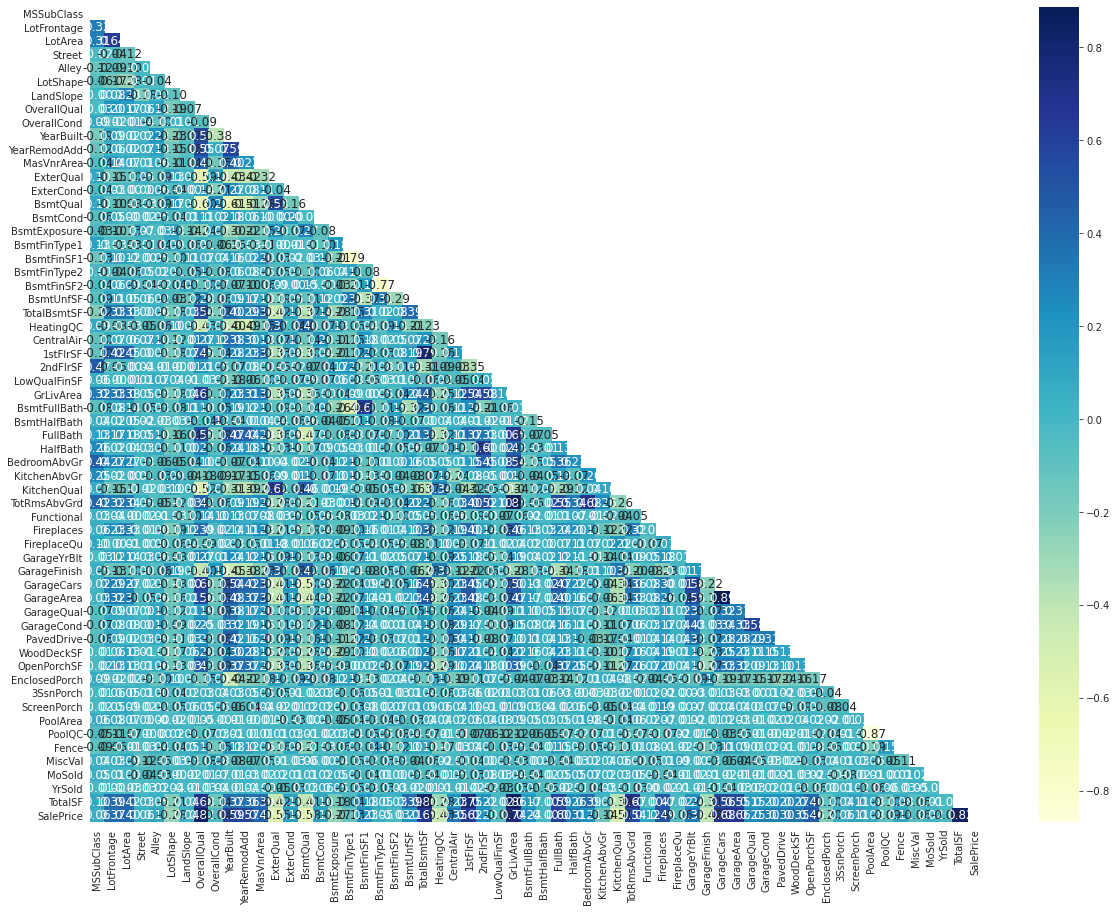

In [31]:
# map coefficients in a heatmap
mask = np.zeros_like(cm)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    hm = sns.heatmap(
        cm, mask=mask, cbar=True, cmap="YlGnBu",
        annot=True, fmt='.2f', annot_kws={'size': 12}, 
        yticklabels=df.columns.values, xticklabels=df.columns.values)

#### Multicollinearity
What: This occurs where the x variables are themselves related<br>
Detection: Look at correlation (p) between X variables, Look at Variance Inflation Factors (VIF)<br>
Remedies: Remove one of the variables

In [40]:
labels = ['F-Statistic', 'F-Test p-value']
df = pd.concat([df_train[num_features], df_ytrain], axis=1).copy()
cols = df_all[num_features].columns
frames = []

#for i, c in enumerate(cols):
    
    # setup for bresuch-pagan test
    #expr = 'SalePrice~' + str(c)
    #model = ols(expr, df[{'SalePrice', c}]).fit()
    #bp_test = het_breuschpagan(model.resid, df[{'SalePrice', c}])
    
    # capture result
    #tmp_d = dict(zip(labels, bp_test))
    #df = round(pd.DataFrame.from_records(tmp_d, index=[i+1]),3)
    #df.insert(loc=0, column='Feature', value=c)
    #frames.append(df)
    
#pd.concat(frames)

The test results are based on null hypothesis: Homoscedasticity is present (equal scatter)<br>
As p is low, null is rejected, i.e. heteroscedasticity (unequal scatter) is assumed.

#### Detect and remove Multicollinearity

The following features are correlated with better predictors of SalePrice
* TotRmsAbvGrd: TotalSF, GrLivArea, FullBath
* YearRemodAdd: YearBuilt, GarageYrBlt
* GarageYrBlt: GarageCars, GarageArea, YearBuilt
* FullBath: GrLivArea
* 1stFlrSF: TotalSF, TotalBsmtSF
* TotalBsmtSF: TotalSF
* GrLivArea: TotalSF
* GarageArea: GarageCars

Keeping these features will not help and could introduce problems

In [34]:
#cols = ['TotRmsAbvGrd', 'YearRemodAdd', 'GarageYrBlt', 'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']

#### Normality
What: For any fixed value of X, Y is normally distributed<br>
Detection:, Histogram or Q-Q plot, Shapiro-Wilk test, Komolgorov-Smirnov test, Anderson-Darling test<br>
Remedy:	Change functional form (log?), Get more observations in dataset